[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

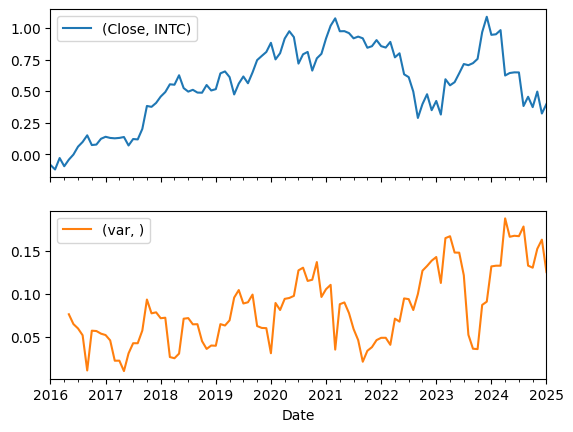

In [20]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
d = yf.download("INTC", start='2016-01-01')
d = d[['Close']]
d = d.pct_change()
d = d.resample("ME").sum()
d['var'] = d['Close'].rolling(5).std()
d['Close'] = d['Close'].cumsum()
d.plot(subplots=True)

In [ ]:
import psycopg2 # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pandas as pd # type: ignore
from tqdm import tqdm # type: ignore
import numpy as np # type: ignore
config = {
    "host": "10.188.200.16",
    "dbname": "tw",
    "user": "jimmy",
    "password": "123123"
}
conn = psycopg2.connect(**config)
cursor = conn.cursor()

# price
sqlStr = """
SELECT DISTINCT p.da, p.nav, p.code, m.fund_type_code
FROM maincode_fund AS m
LEFT JOIN price_fund AS p ON p.code = m.code
WHERE p.da >= '2016-01-01' and m.year = '2025'
ORDER BY p.code, p.da DESC;
"""
cursor.execute(sqlStr)
res = cursor.fetchall()
df = pd.DataFrame(res)
df.columns = ["da", "nav", "code", "fund_type"]
fund_type_list = list(set(df.fund_type))

# fund type to be of stocks
sqlStr = """
SELECT distinct fund_type_code
FROM maincode_fund
WHERE year = '2025' 
AND fund_type LIKE '%股票%'
ORDER BY fund_type_code;
"""
cursor.execute(sqlStr)
conn.commit()
res = cursor.fetchall()
list_stock_fundtype = [i[0] for i in res]

In [3]:
from ibapi.client import *
from ibapi.wrapper import *
import datetime
import time
import threading


from ibapi.contract import Contract
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
import psycopg2
from time import sleep
import pandas as pd
DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
cursor = conn.cursor()
port = 7496

class TestApp(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self, self)
        self.orderId = 0
        self.list_ = []
        etf = pd.read_csv("a.csv")
        self.etfList = list(etf.code)[:]
        self.index = 0
        self.curCode = self.etfList[self.index]
    def nextValidId(self, orderId):
        self.orderId = orderId
    def nextId(self):
        self.orderId += 1
        return self.orderId
    
    def error(self, reqId, errorCode, errorString, advancedOrderReject=""):
        print(f"reqId: {reqId}, errorCode: {errorCode}, errorString: {errorString}, orderReject: {advancedOrderReject}")

    def historicalData(self, reqId, bar):
        bar = bar.to_dict()
        bar['symbol'] = self.curCode
        self.list_.append(bar)
    def historicalDataEnd(self, reqId, start, end):
        self.cancelHistoricalData(reqId)
        self.index += 1
        self.curCode = self.etfList[self.index]
    def loop(self):
        for i in self.etfList:
            mycontract = Contract()
            mycontract.symbol = i
            mycontract.secType = "STK"
            mycontract.exchange = "SMART"
            mycontract.currency = "USD"
            nextId = app.nextId()
            app.reqHistoricalData(nextId, mycontract, "20250120 09:00:00 US/Eastern", "3 W", "1 day", "TRADES", 1, 1, False, [])
app = TestApp()
app.connect("127.0.0.1", port, 0)
threading.Thread(target=app.run).start()
time.sleep(1)

OperationalError: connection to server at "localhost" (::1), port 5432 failed: FATAL:  role "postgres" does not exist


In [ ]:
from ibapi.client import *
from ibapi.wrapper import *
import datetime
import time
import threading


from ibapi.contract import Contract
from ibapi.client import EClient
from ibapi.wrapper import EWrapper
import psycopg2
from time import sleep
import pandas as pd
DB_HOST = 'localhost'
DB_NAME = 'us'
DB_USER = 'postgres'
DB_PASS = 'buddyrich134'
conn = psycopg2.connect(host=DB_HOST, dbname=DB_NAME, user=DB_USER, password=DB_PASS)
cursor = conn.cursor()
port = 7496

class TestApp(EClient, EWrapper):
    def __init__(self):
        EClient.__init__(self, self)
        self.orderId = 0
        self.list_ = []
        etf = pd.read_csv("a.csv")
        self.etfList = list(etf.code)[:]
        self.index = 0
        self.curCode = self.etfList[self.index]
    def nextValidId(self, orderId):
        self.orderId = orderId
    def nextId(self):
        self.orderId += 1
        return self.orderId
    
    def error(self, reqId, errorCode, errorString, advancedOrderReject=""):
        print(f"reqId: {reqId}, errorCode: {errorCode}, errorString: {errorString}, orderReject: {advancedOrderReject}")

    def historicalData(self, reqId, bar):
        bar = bar.to_dict()
        bar['symbol'] = self.curCode
        self.list_.append(bar)
    def historicalDataEnd(self, reqId, start, end):
        self.cancelHistoricalData(reqId)
        self.index += 1
        self.curCode = self.etfList[self.index]
    def loop(self):
        for i in self.etfList:
            mycontract = Contract()
            mycontract.symbol = i
            mycontract.secType = "STK"
            mycontract.exchange = "SMART"
            mycontract.currency = "USD"
            nextId = app.nextId()
            app.reqHistoricalData(nextId, mycontract, "20250120 09:00:00 US/Eastern", "3 W", "1 day", "TRADES", 1, 1, False, [])
app = TestApp()
app.connect("127.0.0.1", port, 0)
threading.Thread(target=app.run).start()
time.sleep(1)

In [ ]:
app.loop()
te = pd.DataFrame(app.list_)
k = list(set(te['symbol']))
len(te), len(k)

In [ ]:
te_f = te.drop_duplicates(subset=["symbol", "date"])
te_f.to_parquet("2025_v1_tickers_test.parquet")
len(te), len(te_f)

In [ ]:
# test for missed symbols
k = list(set(te['symbol']))
for i in app.etfList[:]:
    if i not in k: print(i)

In [ ]:
app.loop()

In [ ]:
mycontract = Contract()
mycontract.symbol = "AAA"
mycontract.secType = "STK"
mycontract.exchange = "SMART"
mycontract.currency = "USD"
app.reqHistoricalData(app.nextId(), mycontract, "20250120 09:00:00 US/Eastern", "1 Y", "1 day", "TRADES", 1, 1, False, [])
